In [106]:
import pandas as pd                                          # pandas is a library for handling tabular data
from sklearn.model_selection import train_test_split         # sklearn is a library for machine learning
from sklearn.naive_bayes import GaussianNB                   # Naive Bayes is a machine learning algorithm
from matplotlib import pyplot as plt                        # pyplot is a library for plotting


In [107]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], inplace=True)    # Drop unnecessary columns
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [109]:
#split the dataset into features and target
x = df.drop(columns=['Survived'])
y= df['Survived']

In [110]:
#create dummy variables 
dummies = pd.get_dummies(df['Sex'])        # Convert categorical variable into dummy/indicator variables
dummies.head()


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [111]:
#concatenate the dummy variables with the original dataset
x = pd.concat([x, dummies], axis=1)
x.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [112]:
#drop the original categorical variable
x.drop(columns=['Sex','male'], inplace=True)
x.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [113]:
x.isnull().sum()   # Check for missing values


Pclass      0
Age       177
Fare        0
female      0
dtype: int64

In [114]:
x = x.fillna(x.mean())    # Replace missing values with the mean

In [115]:
x.isnull().sum()

Pclass    0
Age       0
Fare      0
female    0
dtype: int64

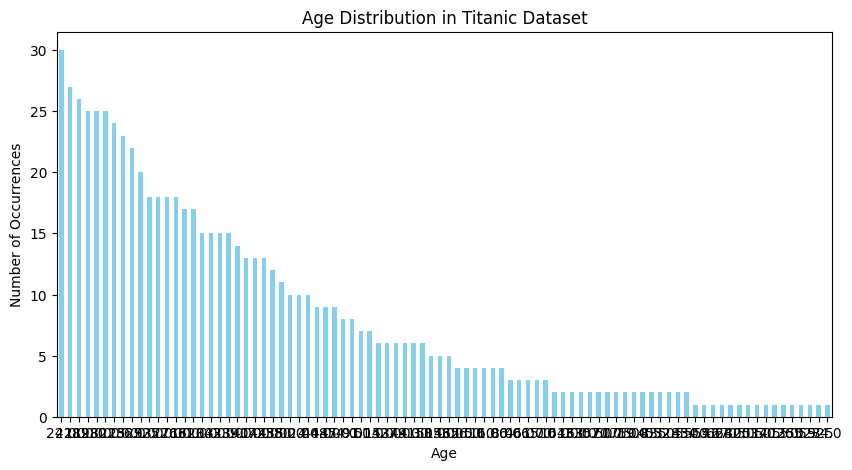

In [116]:
# Bar chart for 'Age' column
df['Age'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Age Distribution in Titanic Dataset")
plt.ylabel('Number of Occurrences')
plt.xlabel('Age')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

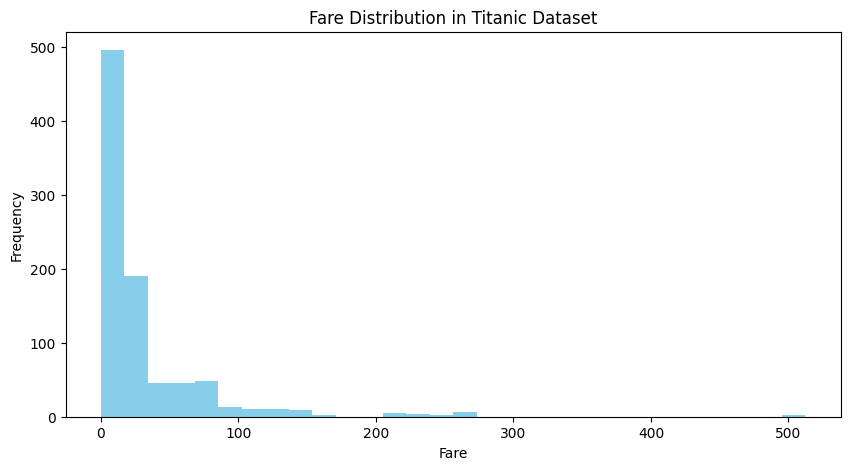

In [117]:
# Histogram for 'Fare' column
plt.figure(figsize=(10, 5))
plt.hist(df['Fare'], bins=30, color='skyblue')
plt.title("Fare Distribution in Titanic Dataset")
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)      # Split the dataset into training and testing sets

In [119]:
#train the model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [120]:
# Test the model
accuracy = model.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8379888268156425
